In [1]:
import numpy as np
import torch
from torch import nn
import torch.optim as optim
import sparsenn

gamma = -0.1
zeta = 1.1
beta = 2/3

input_dim = 1
hidden_dim = (16, 16)
output_dim = 1
model = sparsenn.RegularizedMLP(input_dim, hidden_dim, output_dim, gamma=gamma, zeta=zeta, beta=beta)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-1)

# Dummy data
np.random.seed(0)
x_train = np.random.randn(32, input_dim)
x_train = torch.tensor(x_train).float()
true_fn = lambda x: 2 * x + 1  # Linear relationship for simplicity
y_train = true_fn(x_train) + torch.randn_like(x_train) * 0.33

# Training loop
lmbda_reg = 1e-1
n_epoch = 20000
model.train()
for epoch in range(n_epoch):
    optimizer.zero_grad()
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    reg_loss = model.regularization_loss()
    total_loss = loss + lmbda_reg * reg_loss
    total_loss.backward()
    optimizer.step()

    if (epoch+1) % 500 == 0:
        print(f'Epoch [{epoch+1}/{n_epoch}], Loss: {loss.item():.4f}, Reg Loss: {reg_loss.item():.4f}')

# Test the model
model.eval()
with torch.no_grad():
    test_input = torch.tensor([[1.0]])
    test_output = model(test_input)
    print(f'Test Input: {test_input.item()}, Test Output: {test_output.item()}')

Epoch [500/20000], Loss: 0.1469, Reg Loss: 6.3274
Epoch [1000/20000], Loss: 0.1198, Reg Loss: 3.6091
Epoch [1500/20000], Loss: 0.1198, Reg Loss: 3.2778
Epoch [2000/20000], Loss: 0.1415, Reg Loss: 3.1591
Epoch [2500/20000], Loss: 0.1198, Reg Loss: 3.1013
Epoch [3000/20000], Loss: 0.1198, Reg Loss: 3.0685
Epoch [3500/20000], Loss: 0.1198, Reg Loss: 3.0482
Epoch [4000/20000], Loss: 0.1198, Reg Loss: 3.0349
Epoch [4500/20000], Loss: 0.1198, Reg Loss: 3.0257
Epoch [5000/20000], Loss: 0.1198, Reg Loss: 3.0192
Epoch [5500/20000], Loss: 0.1198, Reg Loss: 3.0145
Epoch [6000/20000], Loss: 0.1198, Reg Loss: 3.0110
Epoch [6500/20000], Loss: 0.1198, Reg Loss: 3.0084
Epoch [7000/20000], Loss: 0.1288, Reg Loss: 3.0064
Epoch [7500/20000], Loss: 0.1198, Reg Loss: 3.0050
Epoch [8000/20000], Loss: 0.1198, Reg Loss: 3.0038
Epoch [8500/20000], Loss: 0.1198, Reg Loss: 3.0030
Epoch [9000/20000], Loss: 0.1198, Reg Loss: 3.0023
Epoch [9500/20000], Loss: 0.1198, Reg Loss: 3.0018
Epoch [10000/20000], Loss: 0.119

In [21]:
from sparsenn import viz

# Render the optimized architecture 
g = viz.gated_connections_graph(model) 
fig = viz.render_sparse_nn(g)

# Calculate the number of non-gated parameters -- you will see it's the same as Reg Loss above
total_non_gated_params = sum(module.count_non_gated_params() for module in model.modules() if isinstance(module, sparsenn.L0Linear))
print(f'Total number of non-gated parameters: {total_non_gated_params}')

Total number of non-gated parameters: 3


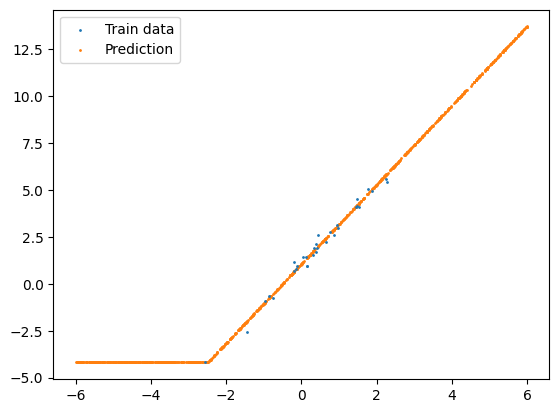

In [22]:
import matplotlib.pyplot as plt

# Make predictions outside the training domain
x_test = (torch.rand(1000, input_dim) - 0.5) * 12
y_test = true_fn(x_test)
model.eval()
with torch.no_grad():
    predictions = model(x_test).numpy()
    predictions = predictions.squeeze(1)

# Plot the results
plt.scatter(x_train, y_train, s=1, label='Train data', zorder=1)
plt.scatter(x_test, predictions, s=1, label='Prediction', zorder=0)
plt.legend()
plt.show()

In [23]:
input_dim = 1
hidden_dim = (100, )
output_dim = 1
model = sparsenn.MonotonicRegularizedMLP(input_dim, hidden_dim, output_dim, gamma=gamma, zeta=zeta, beta=beta)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-1)

# Dummy data
np.random.seed(0)
x_train = np.random.randn(32, input_dim)
x_train = torch.tensor(x_train).float()
true_fn = lambda x: 2 * x + 11  # Linear relationship for simplicity
y_train = true_fn(x_train) + torch.randn_like(x_train) * 0.33

# Training loop
lmbda_reg = 1e-1
n_epoch = 20000
model.train()
for epoch in range(n_epoch):
    optimizer.zero_grad()
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    reg_loss = model.regularization_loss()
    total_loss = loss + lmbda_reg * reg_loss  # np.sqrt(epoch)
    total_loss.backward()
    optimizer.step()

    if (epoch+1) % 500 == 0:
        print(f'Epoch [{epoch+1}/{n_epoch}], Loss: {loss.item():.4f}, Reg Loss: {reg_loss.item():.4f}')

Epoch [500/20000], Loss: 0.3134, Reg Loss: 29.6353
Epoch [1000/20000], Loss: 0.1347, Reg Loss: 18.4171
Epoch [1500/20000], Loss: 0.0954, Reg Loss: 13.4406
Epoch [2000/20000], Loss: 0.0968, Reg Loss: 9.6961
Epoch [2500/20000], Loss: 0.0955, Reg Loss: 7.5693
Epoch [3000/20000], Loss: 0.0993, Reg Loss: 7.2062
Epoch [3500/20000], Loss: 0.0964, Reg Loss: 6.1052
Epoch [4000/20000], Loss: 0.0952, Reg Loss: 4.6046
Epoch [4500/20000], Loss: 0.0952, Reg Loss: 4.1140
Epoch [5000/20000], Loss: 0.0953, Reg Loss: 4.0761
Epoch [5500/20000], Loss: 0.0950, Reg Loss: 4.0525
Epoch [6000/20000], Loss: 0.0951, Reg Loss: 4.0151
Epoch [6500/20000], Loss: 0.0950, Reg Loss: 3.0369
Epoch [7000/20000], Loss: 0.0950, Reg Loss: 3.0257
Epoch [7500/20000], Loss: 0.0950, Reg Loss: 3.0187
Epoch [8000/20000], Loss: 0.0950, Reg Loss: 3.0130
Epoch [8500/20000], Loss: 0.0950, Reg Loss: 2.9608
Epoch [9000/20000], Loss: 0.0950, Reg Loss: 2.0104
Epoch [9500/20000], Loss: 0.0950, Reg Loss: 2.0076
Epoch [10000/20000], Loss: 0.

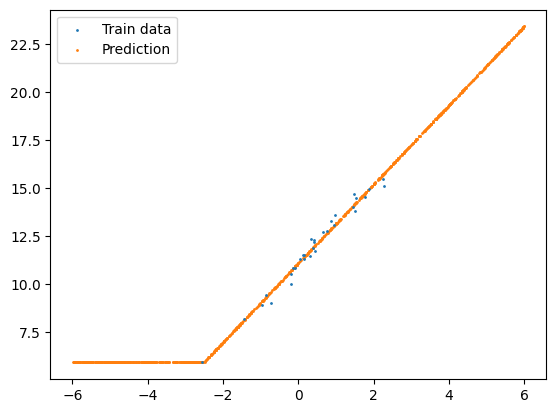

In [24]:
# Make predictions outside the training domain
x_test = (torch.rand(1000, input_dim) - 0.5) * 12
y_test = true_fn(x_test)
model.eval()
with torch.no_grad():
    predictions = model(x_test).numpy()
    predictions = predictions.squeeze(1)

# Plot the results
plt.scatter(x_train, y_train, s=1, label='Train data', zorder=1)
plt.scatter(x_test, predictions, s=1, label='Prediction', zorder=0)
plt.legend()
plt.show()

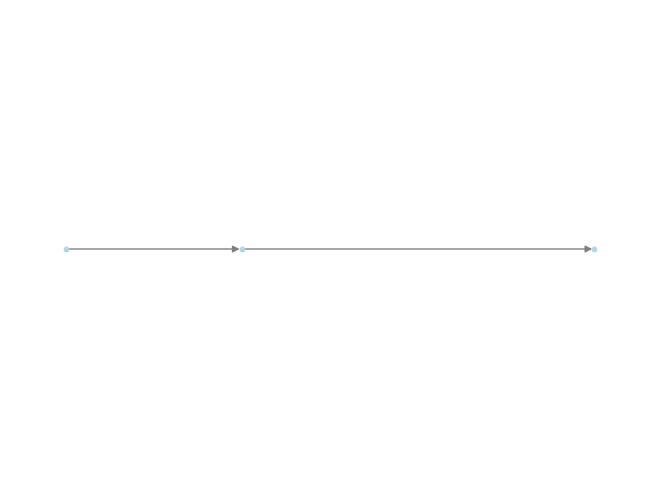

In [41]:
g = viz.gated_connections_graph(model) 
fig = viz.render_sparse_nn(g)